<div align="center">
    <h1>Driver Alertness Detection using ML algorithms</h1>
</div>

![Driving image](https://images.pexels.com/photos/2705755/pexels-photo-2705755.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)


Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

The objective of this project is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.<br>
Dataset collected from:https://www.kaggle.com/competitions/stayalert

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Dowloading the dataset

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/competitions/stayalert/data' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./stayalert" (use force=True to force download)


## Read Data

In [6]:
pd.set_option('display.max_columns', None)

In [6]:
ford=pd.read_csv('stayalert/fordTrain.csv')

In [8]:
ford

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


The dataset contains 604329 rows and 33 columns. Each row of the dataset contains information about one customer.

## Data analysis

In [10]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [16]:
n_rows = ford.shape[0]

In [17]:
n_cols = ford.shape[1]

In [18]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 604329 rows and 33 columns.


## Data Exploration

In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<b> Null values: </b>

In [21]:
feature_with_na=[feature for feature in ford.columns if ford[feature].isnull().sum()>1]
# 2- step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(ford[feature].isnull().mean(), 4)*100,  " % missing values")

there is no null value in the dataset that reduce our preprocessing time

<b> visualizing the columns: </b>

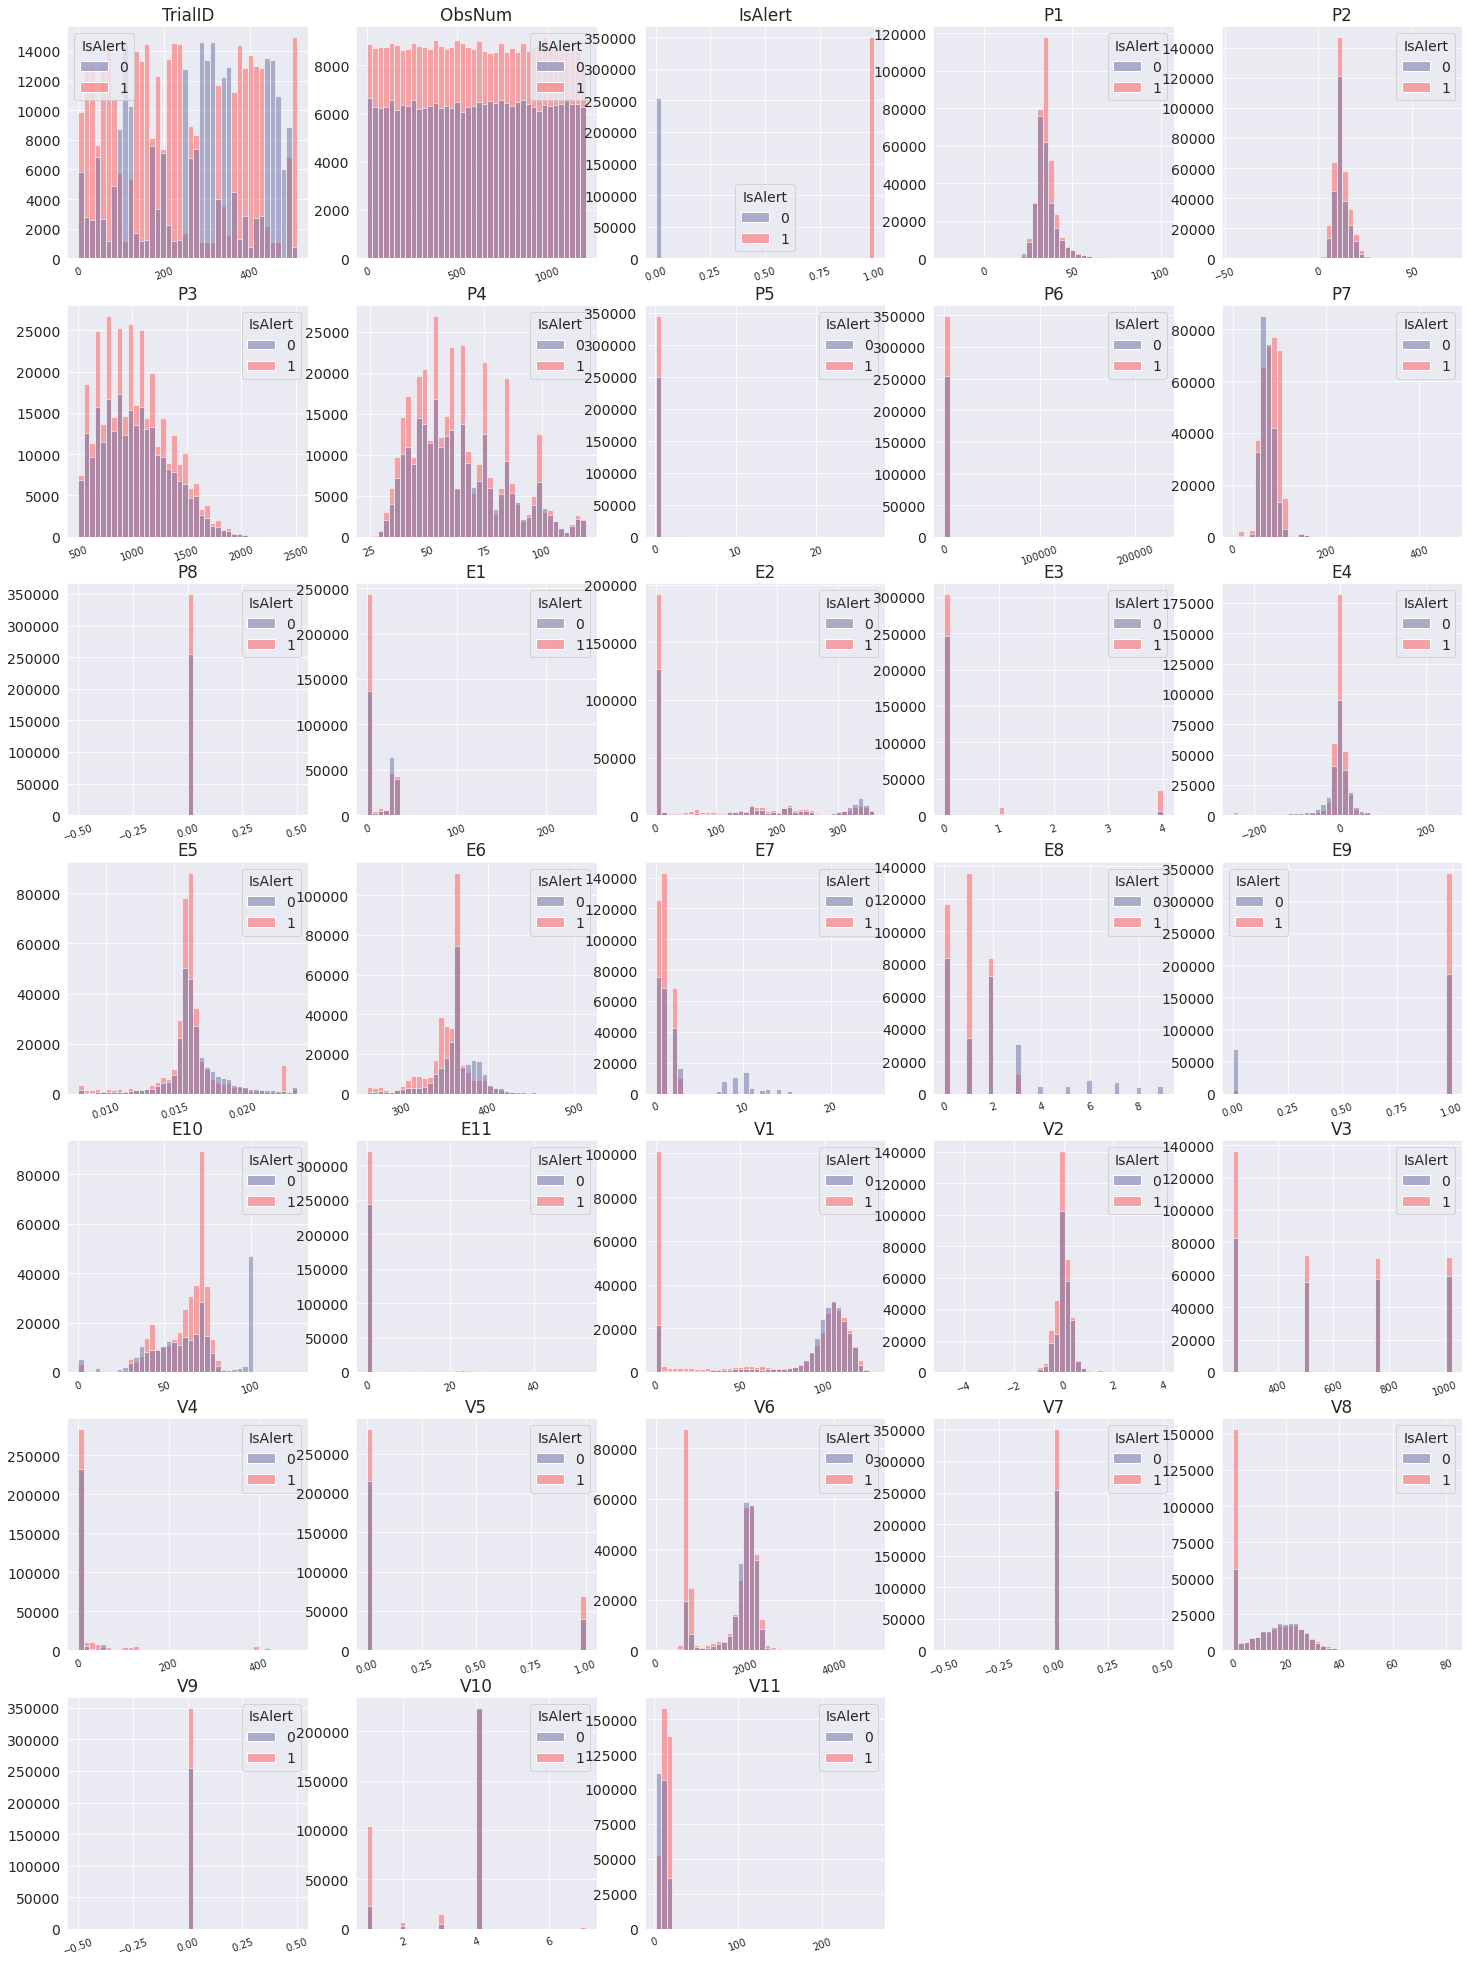

In [22]:
# 0 represent the driver is not aler
# 1 represent the driver is alert
numerical = [feature for feature in ford.columns if ford[feature].dtype in ['int64', 'float64']]
df = ford[numerical]

fig = plt.figure(figsize = (25, 35))

i=1
for n in df.columns:
    plt.subplot(7, 5, i)
    ax = sns.histplot(x = ford[n],hue = ford['IsAlert'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

## Data Pre-processing

While the dataset contains 33 columns, not all of them are useful for modeling. Note the following:

    -The first column and second column- Trial IDand ObsNum is a unique ID and observation number and isn't useful for 
     training the model.
    -The third column IsAlert contains the value we need to predict i.e. it's the target column.
    -Data from all the other columns (except the first,second and the third column) can be used as inputs to the model.

<b> Identifying the input & output columns: </b>

In [7]:
input_cols = list(ford.columns)[3:]

In [8]:
print(input_cols)

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']


In [10]:
target_col =list(ford.columns)[2]

In [10]:
print(target_col)

IsAlert


In [11]:
inputs_df = ford[input_cols]
targets = ford[target_col]

In [28]:
inputs_df

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [29]:
targets

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int64

<b> Identify Numeric and Categorical Data </b>

In [12]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=[object]).columns.tolist()

In [18]:
numeric_cols

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

In [19]:
categorical_cols

[]

As no categorical columns found, so need for conversion.

<b> Scale Numerical Values </b>

In [20]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
min,-22.4812,-45.6292,504.0,23.8853,0.03892,128.0,0.262224,0.0,0.000,0.000,0.0,-250.0,0.008000,260.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.795,240.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,1.67673
max,101.3510,71.1737,2512.0,119.0480,27.20220,228812.0,468.750000,0.0,243.991,359.995,4.0,260.0,0.023939,513.0,25.0,9.0,1.0,127.0,52.4,129.7,3.990,1023.0,484.488,1.0,4892.0,0.0,82.1,0.0,7.0,262.53400


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [14]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


## Splitting training and validation data

In [15]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [16]:
train_targets

504122    1
507742    0
224912    1
561816    0
470792    1
         ..
110268    0
259178    1
365838    0
131932    0
121958    1
Name: IsAlert, Length: 453246, dtype: int64

In [28]:
train_inputs

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
504122,0.480232,0.489311,0.201195,0.443388,0.003582,0.002606,0.176335,0.0,0.105451,0.193589,0.0,0.505882,0.691700,0.162055,0.00,0.000000,1.0,0.543307,0.000000,0.824827,0.545817,0.000000,0.006231,0.0,0.427433,0.0,0.433618,0.0,0.500000,0.058125
507742,0.446919,0.473354,0.292829,0.326386,0.002388,0.002659,0.173451,0.0,0.108738,0.289385,0.0,0.533333,0.632411,0.213439,0.04,0.333333,0.0,0.787402,0.000000,0.785582,0.537849,1.000000,0.006231,0.0,0.403720,0.0,0.000000,0.0,0.500000,0.055619
224912,0.392706,0.513197,0.545817,0.143068,0.008836,0.004180,0.117588,0.0,0.000000,0.000000,0.0,0.000000,0.328063,0.011858,0.08,0.000000,0.0,0.976378,0.000000,0.000000,0.482072,0.653895,0.037114,0.0,0.143091,0.0,0.000000,0.0,0.000000,0.045833
561816,0.628045,0.564273,0.117530,0.601032,0.003057,0.003113,0.151907,0.0,0.059596,0.419811,0.0,0.498039,0.106719,0.328063,0.00,0.000000,1.0,0.393701,0.366412,0.015806,0.537849,0.980843,0.030974,0.0,0.164146,0.0,0.000000,0.0,0.000000,0.041056
470792,0.481435,0.530888,0.147410,0.537130,0.008692,0.002046,0.214325,0.0,0.000000,0.000000,0.0,0.603922,0.490119,0.339921,0.04,0.333333,1.0,0.606299,0.000000,0.782729,0.513944,0.673052,0.003070,0.0,0.409444,0.0,0.232643,0.0,0.500000,0.053410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.438132,0.519740,0.105578,0.629591,0.002579,0.003341,0.143018,0.0,0.025575,0.534007,0.0,0.431373,0.509881,0.608696,0.32,0.333333,0.0,0.787402,0.000000,0.365382,0.565737,0.653895,0.012371,0.0,0.177228,0.0,0.000000,0.0,0.500000,0.021407
259178,0.448405,0.470714,0.254980,0.369575,0.008597,0.003498,0.137449,0.0,0.137997,0.905185,0.0,0.466667,0.501976,0.367589,0.08,0.111111,1.0,0.535433,0.000000,0.893832,0.577689,0.980843,0.012371,0.0,0.460957,0.0,0.000000,0.0,0.500000,0.052122
365838,0.396639,0.484526,0.205179,0.437324,0.001958,0.004093,0.119808,0.0,0.120476,0.016009,0.0,0.454902,0.517787,0.418972,0.08,0.000000,1.0,0.338583,0.000000,0.749576,0.553785,0.000000,0.000000,0.0,0.389002,0.0,0.269184,0.0,0.500000,0.022225
131932,0.511248,0.477379,0.211155,0.428423,0.002006,0.002851,0.163635,0.0,0.120066,0.576941,0.0,0.482353,0.486166,0.359684,0.04,0.111111,1.0,0.574803,0.000000,0.779106,0.545817,0.653895,0.012371,0.0,0.403720,0.0,0.232643,0.0,0.500000,0.026665


## Decision Tree

<b> Training: </br>

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [18]:
train_preds = model.predict(train_inputs)

train_preds

array([1, 0, 1, ..., 0, 0, 1])

<b> Evaluation: </br>

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

dt_train_score = accuracy_score(train_targets, train_preds)
dt_val_score = accuracy_score(val_targets, val_preds)

print("Training Accuracy:", dt_train_score)
print("Validation Accuracy:", dt_val_score)

Training Accuracy: 1.0
Validation Accuracy: 0.9871527570937829


## Random Forest

<b> Training: </br>

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)

model.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

<b> Evaluation: </br>

In [17]:
rf_train_score = model.score(train_inputs, train_targets)
rf_val_score = model.score(val_inputs, val_targets)

print("Training Score:", rf_train_score)
print("Validation Score:", rf_val_score)

Training Score: 1.0
Validation Score: 0.9937385410668308


## SDG

<b> Training: </br>

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

model = SGDClassifier(random_state=42)

# Perform SGD on the training data
model.fit(train_inputs, train_targets)

# Make predictions on the training and validation data
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

<b> Evaluation: </br>

In [21]:
# Calculate the accuracy scores
sdg_train_score = accuracy_score(train_targets, train_preds)
sdg_val_score = accuracy_score(val_targets, val_preds)

print("Training Score:", sdg_train_score)
print("Validation Score:", sdg_val_score)

Training Score: 0.7813924447209682
Validation Score: 0.7815240629322955


## Comparison of the algorithms

As we can see from the models, Random Forest is the best model among the three with a 99% accuracy in the validation dataset.

## Predictions on the test set

In [17]:
test_df = pd.read_csv('stayalert/fordTest.csv')

In [18]:
test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


In [19]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_preds = model.predict(test_df[numeric_cols])


submission_df = pd.read_csv('stayalert/example_submission.csv')

In [20]:
submission_df

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
120835,99,1206,0
120836,99,1207,0
120837,99,1208,0
120838,99,1209,0


In [21]:
submission_df.to_csv('submission.csv', index=False)

In [23]:
solution = pd.read_csv('stayalert/Solution.csv')

In [24]:
solution

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


## Summary

In this project, I've collected a dataset from Kaggle to predict alertness of a driver. I've downloaded, analyzed and pre-processed the dataset at first to understand it and make it usable. Then I have splitted the data into two parts - train and validation. Then, I've created 3 models and found out the best among them which turned out to be Random Forest with a 99% accuracy. After that, I used Random Forest Model to fit the test data and make predictions on which driver is alert and which driver is not and then finally, i saved the result into a csv file. 